In [2]:
#necessary imports
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import SQL_queries as q

#set universal seaborn style and palette
sns.color_palette("deep")
sns.set_style('darkgrid')

# Exploratory Data Analysis - Pittsburgh Penguins Playoff Data - 2017
--------
### To begin the EDA process:
- Use a SQL query to build the first dataFrame
- Clean and organize the data
- Separate into playoff rounds by game_id for easier analysis and visualization


### [Click here to view the SQL queries used in this notebook](SQL_queries.py)

In [3]:
#connect to the database we made in the create_sql_db notebook
conn = sqlite3.connect('NHL_data.db')

In [4]:
#construct the dataFrame
pens_2017_playoff_df = pd.read_sql_query(q.playoff_2017_data_query, conn)
#take a look
pens_2017_playoff_df.head()

,Unnamed: 0,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,...,periodTimeRemaining,dateTime,goals_away,goals_home,play_id,game_id,player_id,playerType,firstName,lastName
0,3211410,2016030141_4,2016030141,29.0,5.0,Faceoff,None,0.0,0.0,1,...,1200.0,2017-04-13 00:40:08,0,0,2016030141_4,2016030141,8471273,Winner,Brandon,Dubinsky
1,3211410,2016030141_4,2016030141,29.0,5.0,Faceoff,None,0.0,0.0,1,...,1200.0,2017-04-13 00:40:08,0,0,2016030141_4,2016030141,8471675,Loser,Sidney,Crosby
2,3211411,2016030141_5,2016030141,29.0,5.0,Hit,None,3.0,39.0,1,...,1182.0,2017-04-13 00:40:40,0,0,2016030141_5,2016030141,8476432,Hitter,Boone,Jenner
3,3211411,2016030141_5,2016030141,29.0,5.0,Hit,None,3.0,39.0,1,...,1182.0,2017-04-13 00:40:40,0,0,2016030141_5,2016030141,8477404,Hittee,Jake,Guentzel
4,3211412,2016030141_6,2016030141,29.0,5.0,Hit,None,-91.0,-36.0,1,...,1178.0,2017-04-13 00:40:44,0,0,2016030141_6,2016030141,8471273,Hitter,Brandon,Dubinsky


### Next, let's explore and clean it up a little:
- take a look at columns and unique values for important categorical columns
- find and delete duplicate values
- identify null values and determine whether to drop values
- replace team_id_for and team_id_against with team name abbreviations for easier readability 

In [5]:
#identify the columns
pens_2017_playoff_df.columns

Index(['Unnamed: 0', 'play_id', 'game_id', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'play_id', 'game_id', 'player_id', 'playerType',
       'firstName', 'lastName'],
      dtype='object')

In [6]:
#find and delete duplicated values
pens_2017_playoff_df = pens_2017_playoff_df.iloc[:,~pens_2017_playoff_df.columns.duplicated()]
#drop unwanted columns
pens_2017_playoff_df = pens_2017_playoff_df.drop(['Unnamed: 0','player_id'], axis=1)

In [7]:
#verify
pens_2017_playoff_df.columns

Index(['play_id', 'game_id', 'team_id_for', 'team_id_against', 'event',
       'secondaryType', 'x', 'y', 'period', 'periodType', 'periodTime',
       'periodTimeRemaining', 'dateTime', 'goals_away', 'goals_home',
       'playerType', 'firstName', 'lastName'],
      dtype='object')

In [8]:
#display values for event, secondaryType, periodType, and playerType:
print(f' Event Types: {pens_2017_playoff_df.event.unique()} \n')
print(f'Secondary Types: {pens_2017_playoff_df.secondaryType.unique()} \n')
print(f' Period Types: {pens_2017_playoff_df.periodType.unique()} \n')
print(f' Player Types: {pens_2017_playoff_df.playerType.unique()}')

 Event Types: ['Faceoff' 'Hit' 'Shot' 'Takeaway' 'Missed Shot' 'Blocked Shot' 'Giveaway'
 'Penalty' 'Goal'] 

Secondary Types: [None 'Wrist Shot' 'Snap Shot' 'Backhand' 'Slap Shot' 'Hooking' 'Tripping'
 'Roughing' 'Interference' 'Tip-In' 'Holding the stick' 'Holding'
 'Wrap-around' 'Cross checking' 'Slashing' 'Misconduct'
 'Too many men on the ice' 'Hi-sticking' 'Interference - Goalkeeper'
 'Delaying Game - Puck over glass' 'Delay of game' 'Game misconduct'
 'Closing hand on puck' 'Charging' 'Boarding' 'Hi stick - double minor'
 'Fighting' 'Deflected' 'Unsportsmanlike conduct' 'Match penalty'] 

 Period Types: ['REGULAR' 'OVERTIME'] 

 Player Types: ['Winner' 'Loser' 'Hitter' 'Hittee' 'Goalie' 'Shooter' 'PlayerID'
 'Blocker' 'DrewBy' 'PenaltyOn' 'Assist' 'Scorer' 'ServedBy']


In [9]:
#check for null values:
pens_2017_playoff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11559 entries, 0 to 11558
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   play_id              11559 non-null  object 
 1   game_id              11559 non-null  int64  
 2   team_id_for          11559 non-null  float64
 3   team_id_against      11559 non-null  float64
 4   event                11559 non-null  object 
 5   secondaryType        3281 non-null   object 
 6   x                    11535 non-null  float64
 7   y                    11535 non-null  float64
 8   period               11559 non-null  int64  
 9   periodType           11559 non-null  object 
 10  periodTime           11559 non-null  int64  
 11  periodTimeRemaining  11559 non-null  float64
 12  dateTime             11559 non-null  object 
 13  goals_away           11559 non-null  int64  
 14  goals_home           11559 non-null  int64  
 15  playerType           11559 non-null 

In [10]:
#determine what percent of secondaryType is null
secondary_type_percent_null_2 = (pens_2017_playoff_df['secondaryType'].isnull().sum())/len(pens_2017_playoff_df)*100
print(f'2017 Secondary Type Null Percent :{secondary_type_percent_null_2:.2f}%')

2017 Secondary Type Null Percent :71.62%


In [11]:
#check to see which events have a secondary type:
pens_2017_playoff_df.dropna().event.unique()

array(['Shot', 'Penalty', 'Goal'], dtype=object)

In [12]:
#as for the 2016 notebook, I will delete this column.
pens_2017_playoff_df = pens_2017_playoff_df.drop('secondaryType',axis=1)

In [13]:
#query the NHL database for all team numbers and their associated abbreviations
team_ids_df = pd.read_sql_query(q.get_abb_query, conn)
#create a dictionary from the abbreviation df
abb_dict = pd.Series(team_ids_df.abbreviation.values,index=team_ids_df.team_id).to_dict()
#replace row values in the dataframe with values from the dictionary
pens_2017_playoff_df = pens_2017_playoff_df.replace({'team_id_for':abb_dict})
pens_2017_playoff_df = pens_2017_playoff_df.replace({'team_id_against':abb_dict})
pens_2017_playoff_df = pens_2017_playoff_df.rename(columns={'team_id_for':'team_for', 'team_id_against':'team_against'})

In [14]:
#confirm replacement
pens_2017_playoff_df.head()

,play_id,game_id,team_for,team_against,event,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,playerType,firstName,lastName
0,2016030141_4,2016030141,CBJ,PIT,Faceoff,0.0,0.0,1,REGULAR,0,1200.0,2017-04-13 00:40:08,0,0,Winner,Brandon,Dubinsky
1,2016030141_4,2016030141,CBJ,PIT,Faceoff,0.0,0.0,1,REGULAR,0,1200.0,2017-04-13 00:40:08,0,0,Loser,Sidney,Crosby
2,2016030141_5,2016030141,CBJ,PIT,Hit,3.0,39.0,1,REGULAR,18,1182.0,2017-04-13 00:40:40,0,0,Hitter,Boone,Jenner
3,2016030141_5,2016030141,CBJ,PIT,Hit,3.0,39.0,1,REGULAR,18,1182.0,2017-04-13 00:40:40,0,0,Hittee,Jake,Guentzel
4,2016030141_6,2016030141,CBJ,PIT,Hit,-91.0,-36.0,1,REGULAR,22,1178.0,2017-04-13 00:40:44,0,0,Hitter,Brandon,Dubinsky


### Now that the DataFrame is cleaned up, I want to separate it into the following rounds:
#### 2017 Playoffs
| Round | Opponent              |
|---|-----------------------|
| 1 | Columbus Blue Jackets |
| 2 | Washington Capitals   |
| 3 | Ottowa Senators       |
| Final | Nashville Predators   | 

To accomplish this, I'll have to groupby 'game_id', and do a little data wrangling with the team names

In [15]:
#groupby game_id
games_teams_2017 = pens_2017_playoff_df.groupby('game_id').team_for.unique().reset_index()
#display current state
games_teams_2017.head()

,game_id,team_for
0,2016030141,"[CBJ, PIT]"
1,2016030142,"[CBJ, PIT]"
2,2016030143,"[PIT, CBJ]"
3,2016030144,"[PIT, CBJ]"
4,2016030145,"[PIT, CBJ]"


In [16]:
#remove PIT, and show only the opposing team:
games_teams_2017['opposing_team'] = games_teams_2017['team_for'].apply(
    lambda row: [val for val in row if val != 'PIT']
)
#remove defunct column
games_teams_2017.drop('team_for',axis=1, inplace=True)
#display new state:
games_teams_2017.head()

,game_id,opposing_team
0,2016030141,[CBJ]
1,2016030142,[CBJ]
2,2016030143,[CBJ]
3,2016030144,[CBJ]
4,2016030145,[CBJ]


In [17]:
#isolate the team name, since it is a list and a string is needed:
games_teams_2017['opposing_team'] = games_teams_2017['opposing_team'].str[0]
#show how many games per team:
games_teams_2017['opposing_team'].value_counts()

opposing_team
WSH    6
OTT    6
CBJ    5
NSH    5
Name: count, dtype: int64

In [18]:
#create a list of game_ids for each playoff round:
CBJ_2017_games = list(games_teams_2017[games_teams_2017['opposing_team']=='CBJ'].game_id)
WSH_2017_games = list(games_teams_2017[games_teams_2017['opposing_team']=='WSH'].game_id)
OTT_2017_games = list(games_teams_2017[games_teams_2017['opposing_team']=='OTT'].game_id)
NSH_2017_games = list(games_teams_2017[games_teams_2017['opposing_team']=='NSH'].game_id)

In [19]:
#use the lists above to filter into rounds:
Round_1_2017 = pens_2017_playoff_df[pens_2017_playoff_df['game_id'].isin(CBJ_2017_games)]
Round_2_2017 = pens_2017_playoff_df[pens_2017_playoff_df['game_id'].isin(WSH_2017_games)]
Round_3_2017 = pens_2017_playoff_df[pens_2017_playoff_df['game_id'].isin(OTT_2017_games)]
Round_4_2017 = pens_2017_playoff_df[pens_2017_playoff_df['game_id'].isin(NSH_2017_games)]
#combine all rounds in a list for easier visualization 
All_rounds_2017 = [Round_1_2017,Round_2_2017,Round_3_2017,Round_4_2017]

### Now that we have the data sorted into rounds, let's calculate some more player stats per playoff round:
- Faceoff Differential
- Penalty Differential

#### To continue the analysis, we'll need to filter the dataframes to only show penguins players
- use a csv file containing the roster for 2017
- separate good and bad plays, to determine which player to filter on (team_against or team_for)

In [20]:
#load the roster into a df
Pens_2017_roster = pd.read_csv('Pens_2017_roster.csv')
#replace special characters to match the database
Pens_2017_roster['Player'] = Pens_2017_roster['Player'].replace({r'\(C\)': '', '-': '', 'ö': 'o', 'ä': 'a', 'ü': 'u'}, regex=True).str.strip()
#split into first and last names
Pens_2017_roster[['firstName', 'lastName']] = Pens_2017_roster['Player'].str.split(expand=True)
#create a roster list by last name
Pens_2017_roster_list = list(Pens_2017_roster['lastName'])

## First, let's take a look at faceoff differentials and how they changed over the course of the 2017 Playoffs

### Faceoff Differential in Hockey

Faceoff differential is a critical metric in hockey that measures a player's effectiveness in winning faceoffs compared to their opponents. Faceoffs are pivotal moments during a game, often determining puck possession and control. This metric is calculated by taking the ratio of faceoffs won (Winner) to the total faceoffs (Winner + Loser) for each player.

### Importance of Faceoff Differential

Faceoff wins contribute directly to a team's ability to control the puck and initiate offensive plays. Players with a positive faceoff differential excel in gaining possession for their team, leading to increased scoring opportunities and defensive stability. Faceoff specialists are particularly valuable during critical moments, such as power plays and penalty kills.

### Plot Interpretation

The line plot below illustrates the faceoff differentials for the top 5 players across the four playoff rounds in the 2016 hockey season. Each line represents a player, with the x-axis denoting the playoff rounds (1 to 4), and the y-axis representing the normalized faceoff differential. The legend displays each player's name along with their average faceoff differential over the four rounds.

### Calculation Methodology

Faceoff differentials were calculated for each player by analyzing two types of faceoffs: faceoffs won (Winner) and faceoffs lost (Loser). The formula used is as follows:

**Faceoff Differential = Faceoffs Won \ (Faceoffs Won + Faceoffs Lost)**

To normalize the faceoff differential, the calculated values were averaged over the four playoff rounds, providing a per-round metric. This normalization accounts for variations in the number of games played by each player across the playoff rounds.

### Observations

- Players with positive differentials excel in winning faceoffs and contributing to their team's overall control of the game.
- Negative differentials may suggest areas for improvement in faceoff skills.

This analysis aims to provide insights into each player's impact during faceoff situations and their contribution to team success.


In [21]:
#function to calculate faceoff wins or losses:
def calculate_faceoffs(round_df, player_type):
    faceoffs = round_df[round_df['playerType'] == player_type]
    faceoffs = faceoffs.groupby('lastName')['playerType'].value_counts().reset_index(name=f'count_{player_type}')
    return faceoffs

#function to calculate faceoff differential for a given round
def calculate_faceoff_stats(wins, losses):
    faceoff_stats = wins.merge(losses, on='lastName', how='left') 
    #drop rows with null values
    faceoff_stats = faceoff_stats.dropna(subset=['count_Winner', 'count_Loser'])
    #calculate faceoff differential
    faceoff_stats['Differential'] = faceoff_stats['count_Winner'] / (faceoff_stats['count_Winner']+ faceoff_stats['count_Loser'])
    return faceoff_stats


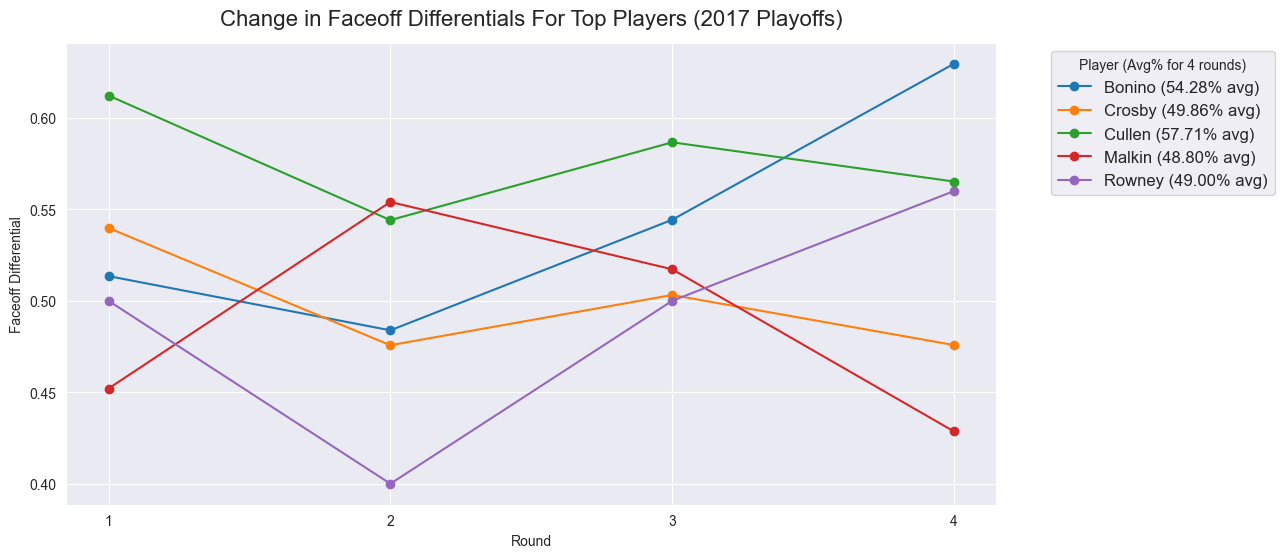

In [62]:
#store all faceoff differentials
all_stats_all_rounds = pd.DataFrame()

#store the number of points for each player
player_points = {}

for i, round_df in enumerate(All_rounds_2017, start=1):
    round_name = f'Round_{i}'

    #calculate faceoff wins and losses
    wins = calculate_faceoffs(round_df, 'Winner')
    losses = calculate_faceoffs(round_df, 'Loser')

    #calculate faceoff stats
    faceoff_stats = calculate_faceoff_stats(wins, losses)

    #filter faceoff_stats for players in the roster list
    faceoff_stats_filtered = faceoff_stats[faceoff_stats['lastName'].isin(Pens_2017_roster_list)].copy()

    #add a column for the round number using .loc
    faceoff_stats_filtered.loc[:, 'round_number'] = i

    #concatenate faceoff stats for the current round to the overall dataframe
    all_stats_all_rounds = pd.concat([all_stats_all_rounds, faceoff_stats_filtered], ignore_index=True)

    #update player_points dictionary
    for player in faceoff_stats_filtered['lastName'].unique():
        player_points[player] = player_points.get(player, 0) + 1

#get unique players with at least two points
players_with_two_points = [player for player, points in player_points.items() if points >= 2]

#filter faceoff stats for players with at least two points
all_stats_all_rounds_filtered = all_stats_all_rounds[all_stats_all_rounds['lastName'].isin(players_with_two_points)]

#create a consistent color mapping for players
player_color_mapping = {player: sns.color_palette()[i] for i, player in enumerate(players_with_two_points)}

#sort players to ensure consistency in legend order
players_with_two_points_sorted = sorted(players_with_two_points)

#plot the change in faceoff differentials over 4 rounds
plt.figure(figsize=(12, 6))

for player in players_with_two_points_sorted:
    player_data = all_stats_all_rounds_filtered[all_stats_all_rounds_filtered['lastName'] == player]
    avg_diff = player_data['Differential'].mean()
    
    plt.plot(
        player_data['round_number'],
        player_data['Differential'],
        label=f'{player} ({avg_diff:.2%} avg)',
        color=player_color_mapping[player],
        marker='o',  # Set the marker type as needed
        linestyle='-',  # Set the line style as needed
    )

#modify x-axis to show only integers 1-4
plt.xticks(range(1, 5))

plt.title('Change in Faceoff Differentials For Top Players (2017 Playoffs)', fontsize=16, y=1.02)
plt.xlabel('Round')
plt.ylabel('Faceoff Differential')
plt.legend(title='Player (Avg% for 4 rounds)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.show()

In the depicted graph, it's evident that Nick Bonino's performance in faceoffs during 2017 paralleled that of 2016, commencing with a comparable success rate in the first and second rounds, hovering around 50%. However, a noteworthy evolution emerged in the subsequent rounds, particularly the third and fourth.

During the fourth round, Bonino exhibited a remarkably elevated average Faceoff % compared to his teammates. This surge in performance, especially in the pinnacle round of the Stanley Cup, underscores his pivotal contributions during critical moments. The significance of such improvement in metrics during this decisive phase implies Bonino's capacity to deliver under the utmost pressure.

## Next, take a look at Penalties

### Penalty Differential in Hockey

Penalty differential is a metric that quantifies a player's impact on penalties during a game. It is calculated by taking the difference between the number of penalties drawn (DrewBy) and the number of penalties taken (PenaltyOn) by a player. A positive penalty differential indicates that a player draws more penalties than they take, while a negative value suggests the opposite.

### Importance of Penalty Differential

Penalty differential is a crucial consideration as it reflects a player's ability to create power-play opportunities for their team while minimizing time spent shorthanded. Players with a positive penalty differential contribute to their team's offensive advantage, putting additional pressure on the opposing team. On the other hand, a negative penalty differential may indicate a player who takes more penalties than they draw, potentially putting their team at a disadvantage.

### Plot Interpretation

The line plot below illustrates the penalty differentials for the top 5 players across the four playoff rounds in the 2016 hockey season. Each line represents a player, with the x-axis denoting the playoff rounds (1 to 4), and the y-axis representing the normalized penalty differential. The legend displays each player's name along with their total penalty differential over the four rounds.

### Calculation Methodology

Penalty differentials were calculated for each player by analyzing two types of penalties: penalties drawn (DrewBy) and penalties taken (PenaltyOn). The formula used is as follows:

**Penalty Differential = Penalties Drawn - Penalties Taken**

To normalize the penalty differential, the calculated values were divided by the total number of games played by each player to provide a per-round metric. This normalization accounts for variations in the number of games played by each player across the playoff rounds.

### Observations

- Positive values indicate players who contribute positively to their team by drawing more penalties than they take.
- Negative values suggest players who may need to minimize their penalty-taking tendencies.

This analysis aims to provide insights into player discipline and their impact on team performance during the playoffs.


In [23]:
player_games_played = {}

#iterate through each round's dataframe
for round_df in All_rounds_2017:
    #extract unique game IDs for each player
    games_played_per_player = round_df.groupby('lastName')['game_id'].nunique().reset_index(name='gamesPlayed')
    #update the dictionary with the total games played for each player
    for index, row in games_played_per_player.iterrows():
        player = row['lastName']
        games_played = row['gamesPlayed']
        player_games_played[player] = player_games_played.get(player, 0) + games_played

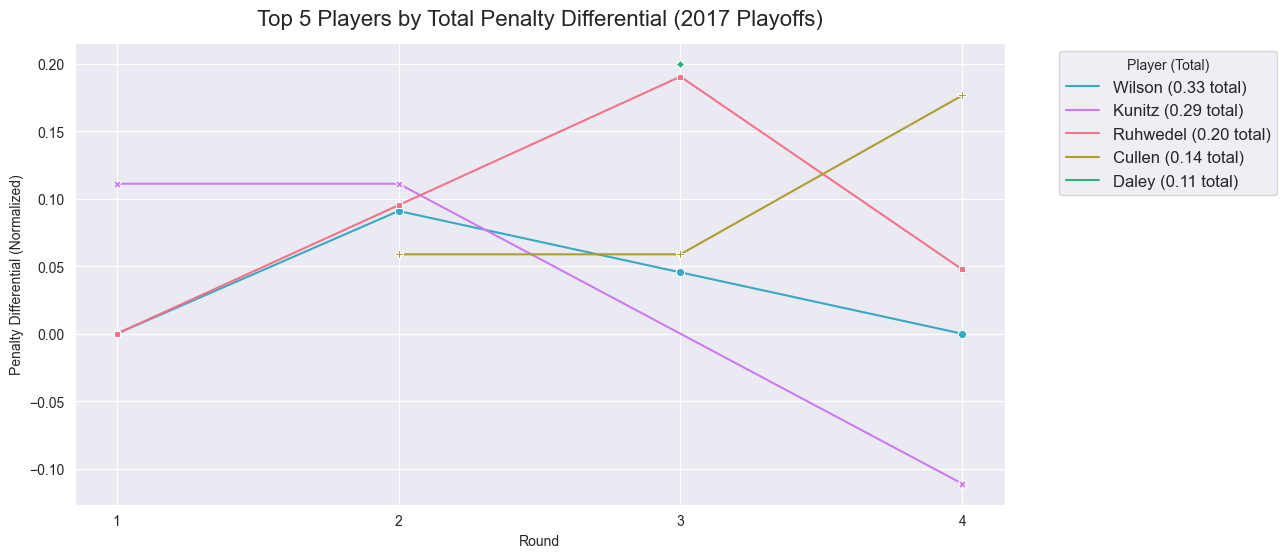

In [63]:
all_penalty_stats_all_rounds = pd.DataFrame()

#store the total penalty differential for each player
player_total_penalty_diff = {}

for i, round_df in enumerate(All_rounds_2017, start=1):
    #calculate penalty differentials
    penalties_on = round_df[round_df['playerType'] == 'PenaltyOn'].groupby('lastName').size().reset_index(name='PenaltiesOn')
    penalties_by = round_df[round_df['playerType'] == 'DrewBy'].groupby('lastName').size().reset_index(name='PenaltiesBy')

    penalty_stats = pd.merge(penalties_on, penalties_by, how='outer', left_on='lastName', right_on='lastName')
    penalty_stats['PenaltiesBy'].fillna(0, inplace=True)
    penalty_stats['Differential'] = penalty_stats['PenaltiesOn'] - penalty_stats['PenaltiesBy']

    #filter penalty_stats for players in the roster list
    penalty_stats_filtered = penalty_stats[penalty_stats['lastName'].isin(Pens_2017_roster_list)].copy()

    #add a column for the round number
    penalty_stats_filtered.loc[:, 'round_number'] = i

    #handle NaN values and division by zero
    penalty_stats_filtered['Differential'] = penalty_stats_filtered['Differential'].fillna(0)
    penalty_stats_filtered['Differential'] /= penalty_stats_filtered['lastName'].map(player_games_played).replace(0, 1)

    #concatenate penalty stats for the current round to the overall dataframe
    all_penalty_stats_all_rounds = pd.concat([all_penalty_stats_all_rounds, penalty_stats_filtered], ignore_index=True)

    #update player_total_penalty_diff dictionary
    for player, diff in zip(penalty_stats_filtered['lastName'], penalty_stats_filtered['Differential']):
        player_total_penalty_diff[player] = player_total_penalty_diff.get(player, 0) + diff

#get the top 5 players by total penalty differential (excluding NaN values)
top_5_players = sorted(player_total_penalty_diff, key=player_total_penalty_diff.get, reverse=True)[:5] 

#filter penalty stats for the top 5 players
all_penalty_stats_all_rounds_filtered = all_penalty_stats_all_rounds[all_penalty_stats_all_rounds['lastName'].isin(top_5_players)]

#create a larger color palette for players
larger_palette = sns.color_palette("husl", n_colors=len(top_5_players))

#create a consistent color mapping for players
player_penalty_color_mapping = {player: larger_palette[i] for i, player in enumerate(top_5_players)}

#plot the penalty differentials over time using seaborn
plt.figure(figsize=(12, 6))
penalty_plot = sns.lineplot(
    data=all_penalty_stats_all_rounds_filtered,
    x='round_number',
    y='Differential',
    hue='lastName',
    palette=player_penalty_color_mapping,
    style='lastName',
    markers=True,
    dashes=False,
)

#modify x-axis to show only integers 1-4
plt.xticks(range(1, i + 1))

#add total penalty differential to the legend with appropriate line styles
penalty_legend_labels = []
for player, line_style in zip(top_5_players, penalty_plot.lines):
    total_diff = player_total_penalty_diff[player]
    penalty_legend_labels.append(f'{player} ({total_diff:.2f} total)')

#explicitly set the line styles in the legend
penalty_legend = plt.legend(
    penalty_legend_labels,
    title='Player (Total)',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12,
)

#get the handles for the lines in the plot
handles, _ = penalty_plot.get_legend_handles_labels()

#create a list of Line2D objects
line2d_objects = [plt.Line2D([0], [0], color=handle.get_color(), linestyle='-', linewidth=handle.get_linewidth()) for handle in handles]

#update the line styles in the legend
for line, style in zip(line2d_objects, penalty_legend.legend_handles):
    style.set_linestyle('-')  # Set the desired line style here

#update the legend
penalty_legend = plt.legend(
    line2d_objects,
    penalty_legend_labels,
    title='Player (Total)',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12,
)

plt.title('Top 5 Players by Total Penalty Differential (2017 Playoffs)', fontsize=16, y=1.02)
plt.xlabel('Round')
plt.ylabel('Penalty Differential (Normalized)')
plt.show()

**Analysis**
The analysis of penalty differentials for the top five players in the 2017 playoff rounds reveals an interesting trend. Contrary to expectations, the top performers in terms of penalty differentials are not the well-known star players on the team. In fact, the players with the highest penalty differentials are not among the recognized names. This unexpected finding challenges the common assumption that top-performing players, who often dominate offensive and defensive statistics, would also lead in penalty differentials.

**Hypothesis**
One plausible explanation for this discrepancy is that the players with the highest penalty differentials may specialize in a more physical style of play. While star players focus on scoring goals and creating opportunities, these less-recognized players may contribute to the team by engaging in more aggressive and physical aspects of the game. Their playing style might lead to higher instances of penalties drawn or committed, influencing the penalty differentials.

Additionally, it's possible that the top players on the team are more strategic and disciplined in their play, avoiding unnecessary penalties. These star players may prioritize maintaining on-ice presence and avoiding penalties that could jeopardize their team's chances of success. In contrast, players with higher penalty differentials may be involved in more physical confrontations or play in a manner that results in a greater number of penalties.

**Conclusion**
In conclusion, the analysis suggests that penalty differentials alone may not be a comprehensive indicator of a player's overall contribution or importance to the team. The unique playing styles and roles of different players contribute to a nuanced understanding of team dynamics beyond traditional metrics. Further investigation into the specific playing styles and roles of players with high penalty differentials could provide additional insights into the dynamics of successful hockey teams.


## Let's sort the good and bad plays to visualize events for the HBK line throughout the season

In [25]:
#function that sorts good and bad plays
def sort_good_bad_plays(df):
    good_plays_df = df.loc[((df['playerType'].isin(['Hitter','Blocker','Scorer','Shooter'])) | (df['event']=='Takeaway'))]
    bad_plays_df = df.loc[(df['playerType'].isin(['Hittee','Shooter','DrewBy'])) | (df['event']=='Giveaway')]
    return good_plays_df, bad_plays_df

In [26]:
#sort every round into good and bad plays
Round_1_2017_good_plays, Round_1_2017_bad_plays = sort_good_bad_plays(Round_1_2017)
Round_2_2017_good_plays, Round_2_2017_bad_plays = sort_good_bad_plays(Round_2_2017)
Round_3_2017_good_plays, Round_3_2017_bad_plays = sort_good_bad_plays(Round_3_2017)
Round_4_2017_good_plays, Round_4_2017_bad_plays = sort_good_bad_plays(Round_4_2017)

In [27]:
#filter using the roster list to only show Penguins players
Round_1_2017_good_plays = Round_1_2017_good_plays[Round_1_2017_good_plays['lastName'].isin(Pens_2017_roster_list)]
Round_1_2017_bad_plays = Round_1_2017_bad_plays[Round_1_2017_bad_plays['lastName'].isin(Pens_2017_roster_list)]

Round_2_2017_good_plays = Round_2_2017_good_plays[Round_2_2017_good_plays['lastName'].isin(Pens_2017_roster_list)]
Round_2_2017_bad_plays = Round_2_2017_bad_plays[Round_2_2017_bad_plays['lastName'].isin(Pens_2017_roster_list)]

Round_3_2017_good_plays = Round_3_2017_good_plays[Round_3_2017_good_plays['lastName'].isin(Pens_2017_roster_list)]
Round_3_2017_bad_plays = Round_3_2017_bad_plays[Round_3_2017_bad_plays['lastName'].isin(Pens_2017_roster_list)]

Round_4_2017_good_plays = Round_4_2017_good_plays[Round_4_2017_good_plays['lastName'].isin(Pens_2017_roster_list)]
Round_4_2017_bad_plays = Round_4_2017_bad_plays[Round_4_2017_bad_plays['lastName'].isin(Pens_2017_roster_list)]

#compile into lists for easier visualization tools
good_plays_2017_all_rounds = [Round_1_2017_good_plays, Round_2_2017_good_plays, Round_3_2017_good_plays, Round_4_2017_good_plays]
bad_plays_2017_all_rounds = [Round_1_2017_bad_plays, Round_2_2017_bad_plays, Round_3_2017_bad_plays, Round_4_2017_bad_plays]

In [28]:
#take a look at the playerType values:
good_player_types = Round_1_2017_good_plays.playerType.unique()
bad_player_types = Round_1_2017_bad_plays.playerType.unique()
print(f'good player types:{good_player_types}\nbad player types:{bad_player_types}\n')
#leave takeaways separate for now:
good_player_types = np.delete(good_player_types,2,0)
bad_player_types  = np.delete(bad_player_types,2,0)
#verify deletion:
print(f'corrected good player types:{good_player_types}\ncorrected bad player types:{bad_player_types}')

good player types:['Shooter' 'Hitter' 'PlayerID' 'Blocker' 'Scorer']
bad player types:['Hittee' 'Shooter' 'PlayerID' 'DrewBy']

corrected good player types:['Shooter' 'Hitter' 'Blocker' 'Scorer']
corrected bad player types:['Hittee' 'Shooter' 'DrewBy']


#### The function below uses a hockey rink image in the background to easily visualize plays given their coordinates

In [29]:
def plotHockeyPoints_all_rounds(round_dfs, column, column_filter, players_of_interest):
    """
    Plot play points on the ice for all rounds, differentiating colors for each dataframe.

    :param round_dfs: List of DataFrames for each round
    :param column: This is the category that you are plotting on
    :param column_filter: Choose a way to filter the category
    :param players_of_interest: List of players to include
    :return: An image of the x, y coordinates for each play fitting the filter, overlayed on a hockey rink.
    """
    #combine all rounds into a single DataFrame
    combined_df = pd.concat(round_dfs)

    plt.figure(figsize=(10, 8))

    #filter the combined DataFrame
    scatter_data = combined_df.loc[(combined_df[column] == column_filter) & (combined_df['lastName'].isin(players_of_interest))]

    #plot on hockey rink image
    fig = sns.scatterplot(x='x', y='y', data=scatter_data, hue='lastName')

    plt.title(f'Location of {column_filter}s')
    im = plt.imread("rink.jpg")
    im = fig.imshow(im, extent=[-105, 105, -45.5, 45.5])
    plt.xlabel('')
    plt.ylabel('')
    fig.set(xticklabels=[])
    fig.set(yticklabels=[])
    fig.grid(False)

    #count occurrences of each player in the legend
    player_counts = scatter_data['lastName'].value_counts().to_dict()

    #get legend handles and labels
    handles, labels = fig.get_legend_handles_labels()

    #modify legend labels to include counts, handle cases where player is not in player_counts
    legend_labels = [f'{label} ({player_counts.get(label, 0)})' for label in labels]
    fig.legend(handles, legend_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show()
    plt.close()

### First, we can visualize the good plays for the HBK line throughout the season:
- Shots on net
- Hits
- Blocked goals
- Goals

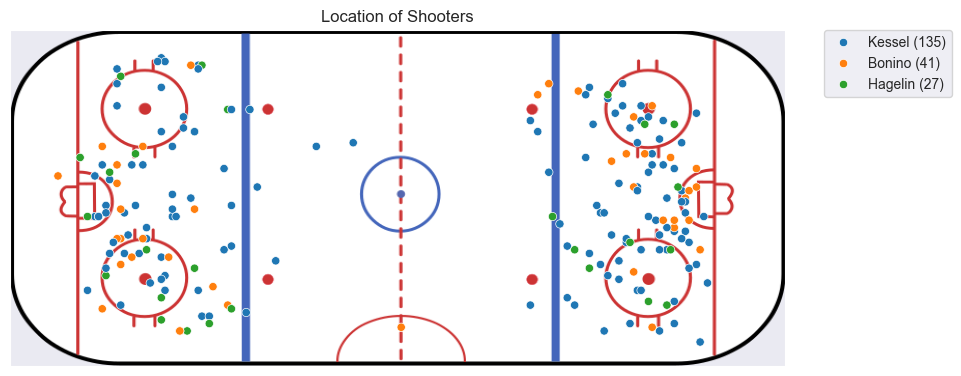

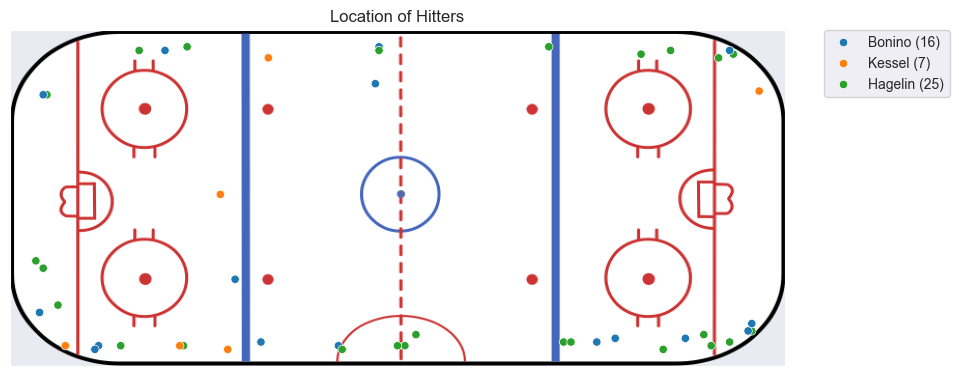

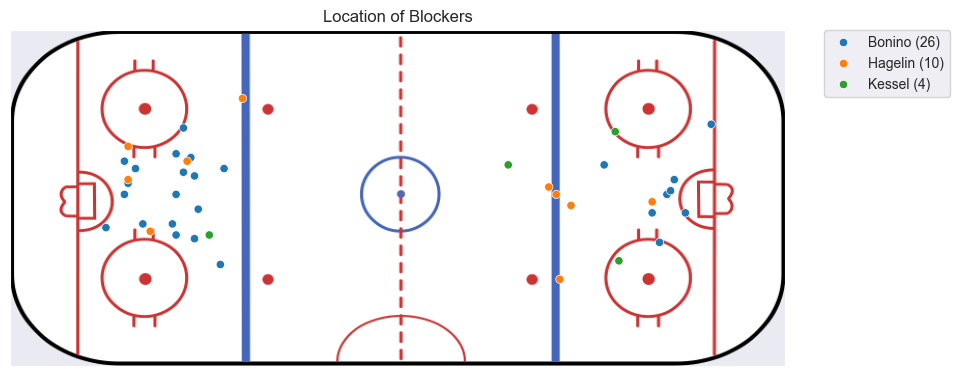

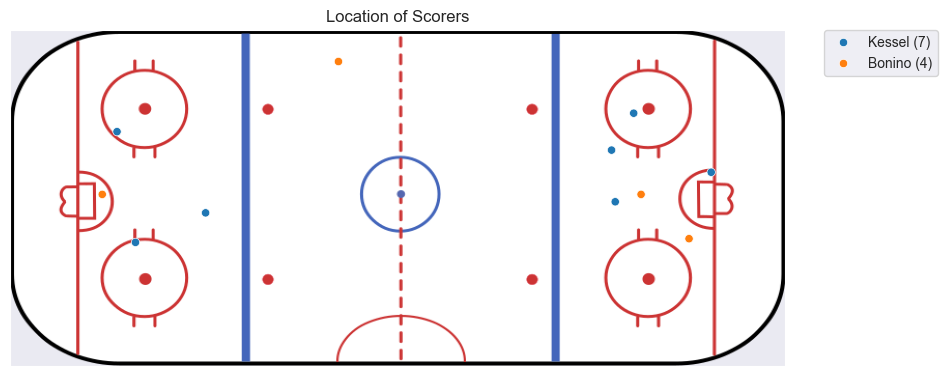

In [30]:
#graphs location and number of good plays for the HBK line 
for type in good_player_types:
    plotHockeyPoints_all_rounds(good_plays_2017_all_rounds, column='playerType', column_filter=type, players_of_interest=['Hagelin', 'Bonino', 'Kessel'])

Mirroring trends observed in the 2016 analysis, Phil Kessel emerged as a dominant force within the line, showcasing a substantial lead in shots taken and scoring nearly double the goals compared to Bonino. 

Meanwhile, Carl Hagelin, despite not netting any goals, significantly contributed by leading in hits and accumulating over twice as many blocks as Kessel. 

In line with his role as the Center, Nick Bonino continued his responsibility for the majority of blocked shots on net, maintaining consistency from the previous year.

### Now the 'bad' plays for the HBK line
- Hittee (recipient of a hit)
- Shooter (of a blocked shot - failed scoring attempt)
- DrewBy (drew a penalty, thus resulting in the opposing team's power play)

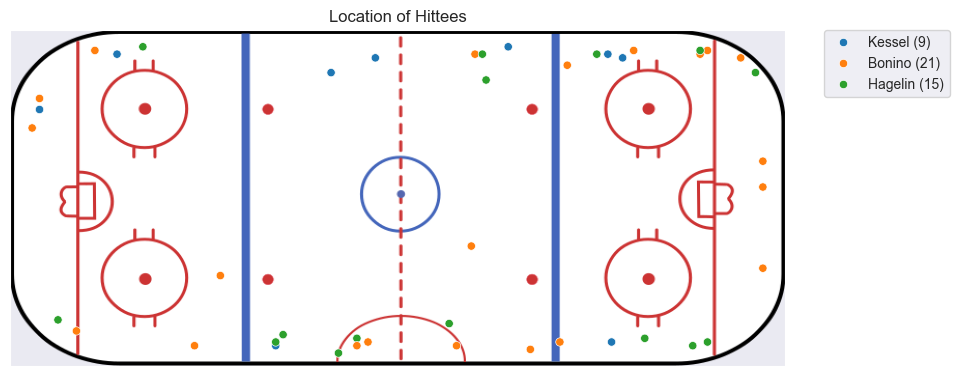

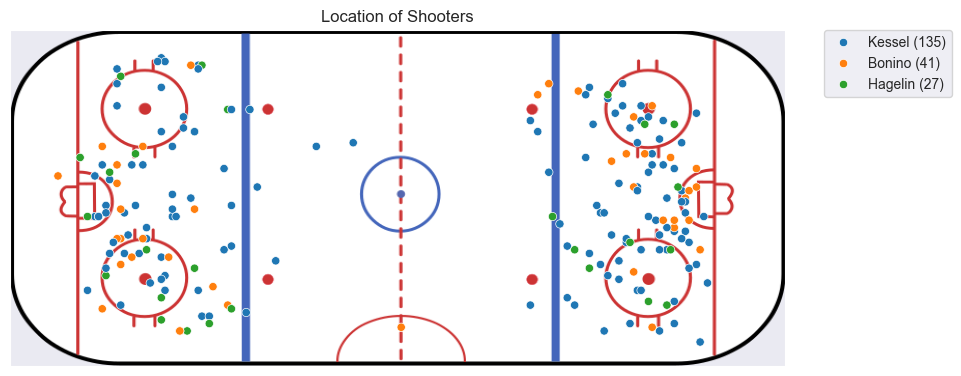

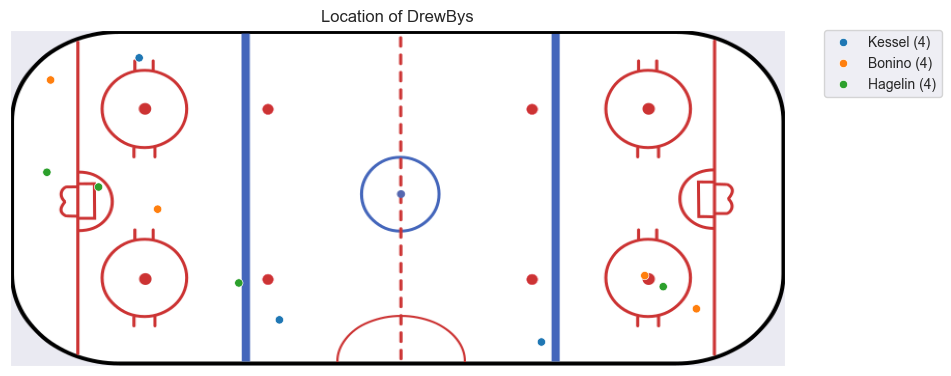

In [31]:
for type in bad_player_types:
    plotHockeyPoints_all_rounds(bad_plays_2017_all_rounds, column='playerType', column_filter=type, players_of_interest=['Hagelin', 'Bonino', 'Kessel'])

In 2017, a notable reduction in "bad" plays was observed among the HBK line. 

Surprisingly, Nick Bonino took more hits than Carl Hagelin, a shift from the previous playoffs where Hagelin led in hits. Phil Kessel continued to display his prowess, recording more blocked shots, underscoring his effectiveness on the ice as a consistent shot generator. 

Impressively, all three players managed to draw only four penalties throughout the entire playoff season, highlighting their disciplined and effective playing style.

### Last, let's look at Takeaways and Giveaways

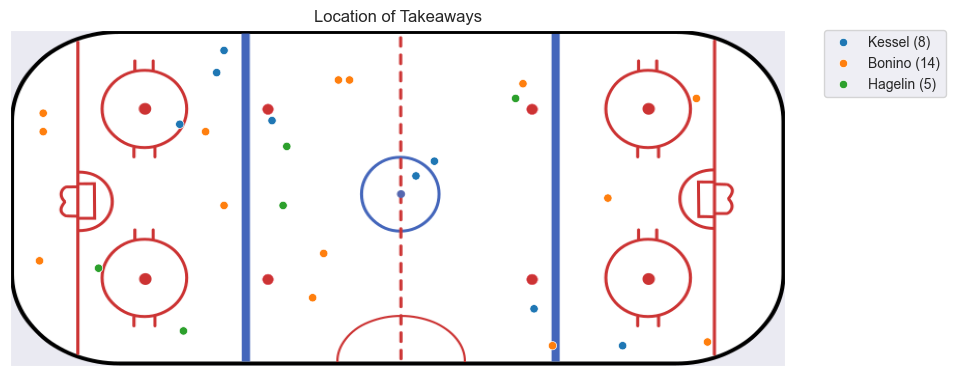

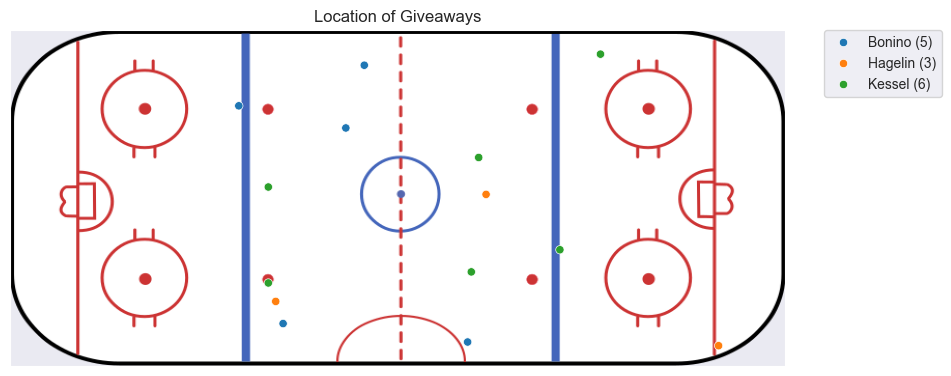

In [32]:
plotHockeyPoints_all_rounds(good_plays_2017_all_rounds, column='event', column_filter='Takeaway', players_of_interest=['Hagelin', 'Bonino', 'Kessel'])
plotHockeyPoints_all_rounds(bad_plays_2017_all_rounds, column='event', column_filter='Giveaway', players_of_interest=['Hagelin', 'Bonino', 'Kessel'])


Continuing the trend from the previous year, Bonino continues to excel in takeaways for the HBK line. 

Hagelin demonstrated an impressive improvement, registering the fewest giveaways this year. It's noteworthy that overall giveaway numbers remain remarkably low, showcasing the line's exceptional ability to retain possession and minimize puck turnovers, even when compared to their solid performance in the previous year (5, 3, 6, instead of 9, 12, 14, respectively). This is an indication of how the line consistently displayed a strong command over puck possession.

## Next, let's get into some more advanced stats and success metrics
### We'll use two dataFrames:
- The first contains more basic stats and has the advantage of being broken down into games to eventually group by round if needed
- The second has complex stats for the entire playoff season

#### To combine the two initially for a great overall understanding, we can aggregate the first dF by player and merge it with the second.

In [33]:
#build dataFrame from SQL query
pens_2017_playoff_skater_stats_basic = pd.read_sql_query(q.skater_stats_2017_query,conn)

In [34]:
#take a look at columns
pens_2017_playoff_skater_stats_basic.columns

Index(['game_id', 'player_id', 'team_id', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce',
       'firstName', 'lastName', 'primaryPosition', 'abbreviation'],
      dtype='object')

In [35]:
#delete unwanted columns
pens_2017_playoff_skater_stats_basic = pens_2017_playoff_skater_stats_basic.drop(['player_id','team_id'], axis=1)

#### Form the aggregated dataframe to prepare for a merge

In [36]:
players_2017_sums_df = pens_2017_playoff_skater_stats_basic.groupby('lastName').aggregate({'goals':'sum', 'assists':'sum', 'plusMinus':'sum', 'hits':'sum', 'game_id':'count', 'timeOnIce':'mean', 'shots':'sum', 'takeaways':'sum','giveaways':'sum','blocked':'sum'}).reset_index()

### Now let's put together the advanced stats dataframe

In [37]:
#build a dF from a csv file obtained from hockey-reference.com
pens_2017_playoff_skater_stats_adv = pd.read_csv('2017_adv_stats_pens_playoffs.csv',header=1)

In [38]:
#see what null values exist
null_counts = pens_2017_playoff_skater_stats_adv.isnull().sum()
print(null_counts[null_counts > 0])

E+/-    23
dtype: int64


In [39]:
#drop all nulls, since it is just an empty column
pens_2017_playoff_skater_stats_adv = pens_2017_playoff_skater_stats_adv.dropna(axis=1)

#### Now let's easily add the first and last name columns by reusing work done previously with the roster:

In [40]:
#merge with roster on Player (full name)
pens_2017_playoff_skater_stats_adv = pd.merge(pens_2017_playoff_skater_stats_adv, Pens_2017_roster[['Player', 'firstName', 'lastName']], on='Player', how='left')

In [41]:
#take a look at columns
pens_2017_playoff_skater_stats_adv.columns

Index(['Rk', 'Player', 'Age', 'Pos', 'GP', 'CF', 'CA', 'CF%', 'CF% rel', 'FF',
       'FA', 'FF%', 'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%',
       'TOI/60', 'TOI(EV)', 'TK', 'GV', 'SAtt.', 'Thru%', '-9999', 'firstName',
       'lastName'],
      dtype='object')

In [42]:
#drop unwanted columns
pens_2017_playoff_skater_stats_adv = pens_2017_playoff_skater_stats_adv.drop(['Player','Age','-9999'], axis=1)

In [43]:
#get the list of column names
columns = list(pens_2017_playoff_skater_stats_adv.columns)
#specify the new column order
new_order = columns[-2:] + columns[:-2]
#reorder the columns in the DataFrame
pens_2017_playoff_skater_stats_adv = pens_2017_playoff_skater_stats_adv[new_order]
#take a look
pens_2017_playoff_skater_stats_adv.head()

,firstName,lastName,Rk,Pos,GP,CF,CA,CF%,CF% rel,FF,...,oiSV%,PDO,oZS%,dZS%,TOI/60,TOI(EV),TK,GV,SAtt.,Thru%
0,Josh,Archibald,1,RW,4,17,17,50.0,-5.9,10,...,85.7,85.7,33.3,66.7,7:51,7:40,0,0,6,66.7
1,Nick,Bonino,2,C,21,211,312,40.3,-7.8,173,...,96.6,103.6,28.2,71.8,16:06,12:15,15,6,51,64.7
2,Ian,Cole,3,D,25,357,401,47.1,1.3,255,...,91.3,101.8,49.4,50.6,18:03,15:31,9,17,60,38.3
3,Sidney,Crosby,4,C,24,373,384,49.3,3.8,251,...,91.7,102.8,56.2,43.8,18:43,15:31,16,15,110,57.3
4,Matt,Cullen,5,C,25,202,283,41.6,-5.7,154,...,91.5,100.3,16.8,83.2,13:49,11:14,4,6,34,64.7


## Now we can put the basic and advanced stats all together into one large DataFrame

In [44]:
#merge on lastName
pens_player_stats_2017 = pd.merge(players_2017_sums_df, pens_2017_playoff_skater_stats_adv, on='lastName')

In [45]:
#take a look at columns
pens_player_stats_2017.columns

Index(['lastName', 'goals', 'assists', 'plusMinus', 'hits', 'game_id',
       'timeOnIce', 'shots', 'takeaways', 'giveaways', 'blocked', 'firstName',
       'Rk', 'Pos', 'GP', 'CF', 'CA', 'CF%', 'CF% rel', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'SAtt.', 'Thru%'],
      dtype='object')

In [46]:
#duplicate values exist (some with different column names), let's get rid of them

#transpose the DataFrame and identify duplicate rows (duplicate columns after transposing)
duplicates = pens_player_stats_2017.T[pens_player_stats_2017.T.duplicated()].index
#drop duplicate columns
pens_player_stats_2017 = pens_player_stats_2017.drop(columns=duplicates, errors='ignore')
#verify
pens_player_stats_2017.columns

Index(['lastName', 'goals', 'assists', 'plusMinus', 'hits', 'game_id',
       'timeOnIce', 'shots', 'takeaways', 'giveaways', 'blocked', 'firstName',
       'Rk', 'Pos', 'GP', 'CF', 'CA', 'CF%', 'CF% rel', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'SAtt.', 'Thru%'],
      dtype='object')

## Here we look more deeply at measures of success for the 2017 playoffs

### Shot Statistics Overview

In hockey analytics, shot statistics provide valuable insights into a team's or player's offensive performance. Let's explore key shot metrics:

**Shots Attempted (SAtt.)** Total number of shots attempted in all game situations.

**Shots on Goal (Shots)** Subset of attempted shots that were on target and required the goaltender to make a save.

**Through Percentage (Thru%)** Percentage of shots that successfully made it through to the net out of the total shots attempted (SAtt.).

**Shots Made Percentage (Shots_made_percent)** Percentage of shots on goal that resulted in a goal.

By examining these shot statistics, analysts and fans gain a comprehensive understanding of the offensive dynamics, accuracy, and goal-scoring proficiency of a team or player. These metrics contribute to a nuanced evaluation of performance beyond traditional box score statistics.


In [47]:
#calculate percent of successful shots:
pens_player_stats_2017['shot_success_rate'] = (pens_player_stats_2017['goals']/pens_player_stats_2017['shots'])*100
#separate shots stats into their own df
shooting_stats_2017 = pens_player_stats_2017[['lastName','SAtt.','shots','shot_success_rate','goals', 'Thru%']].sort_values(by='SAtt.', ascending=False)
#print the resulting df, sorted by all shots made
shooting_stats_2017

,lastName,SAtt.,shots,shot_success_rate,goals,Thru%
10,Kessel,153,68,11.764706,8,44.4
3,Crosby,110,63,12.698413,8,57.3
12,Malkin,99,60,16.666667,10,60.6
7,Guentzel,91,52,25.000000,13,58.2
17,Sheary,68,44,4.545455,2,64.7
15,Rust,68,42,16.666667,7,61.8
16,Schultz,62,26,15.384615,4,41.9
2,Cole,60,23,0.000000,0,38.3
19,Wilson,55,39,7.692308,3,50.9
6,Dumoulin,53,25,4.000000,1,47.2


#### Let's visualize these numbers for the top five scorers

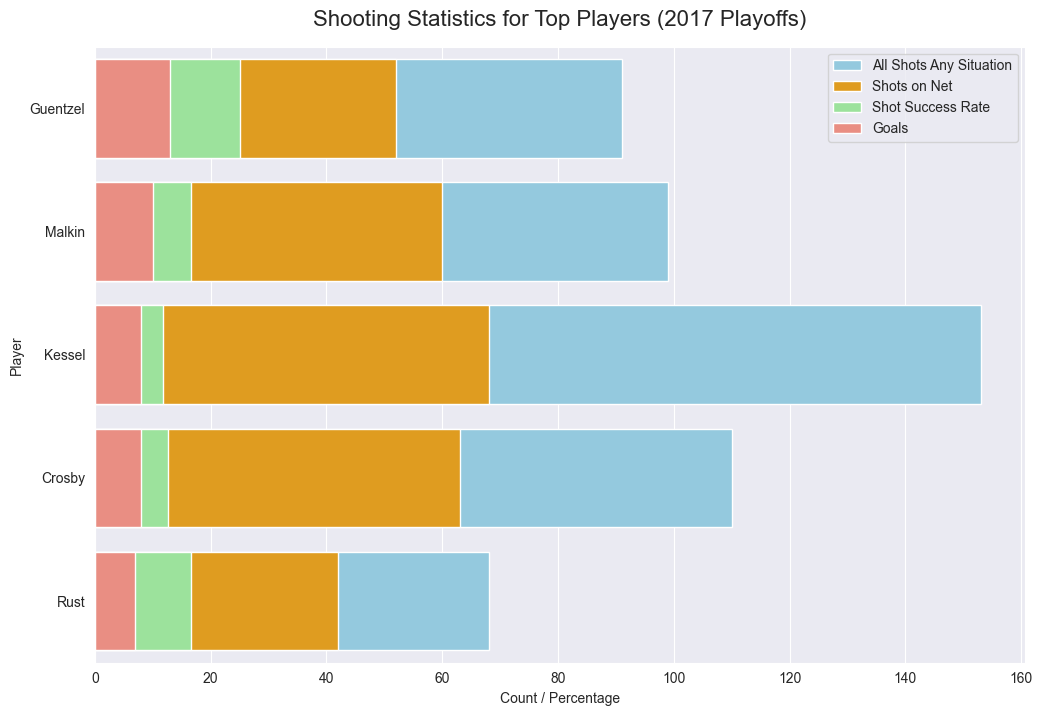

In [64]:
#sort the DataFrame by shots made
shooting_stats_2017_sorted = shooting_stats_2017.sort_values(by='goals', ascending=False)

#select the top 5 players
top_players = shooting_stats_2017_sorted.head(5)

plt.figure(figsize=(12, 8))

sns.barplot(x='SAtt.', y='lastName', data=top_players, color='skyblue', label='All Shots Any Situation')
sns.barplot(x='shots', y='lastName', data=top_players, color='orange', label='Shots on Net')
sns.barplot(x='shot_success_rate', y='lastName', data=top_players, color='lightgreen', label='Shot Success Rate')
sns.barplot(x='goals', y='lastName', data=top_players, color='salmon', label='Goals')


plt.xlabel('Count / Percentage')
plt.ylabel('Player')
plt.title('Shooting Statistics for Top Players (2017 Playoffs)', fontsize=16, y=1.02)
plt.legend()
plt.show()

In 2017, Kessel continued his trend from the previous year, significantly out-shooting his teammates. Despite an improved success rate, he secured the third position in the goals category, trailing behind Jake Guentzel and Evgeni Malkin. 

Kessel outperformed Sidney Crosby in all the mentioned shot metrics for the 2017 season.

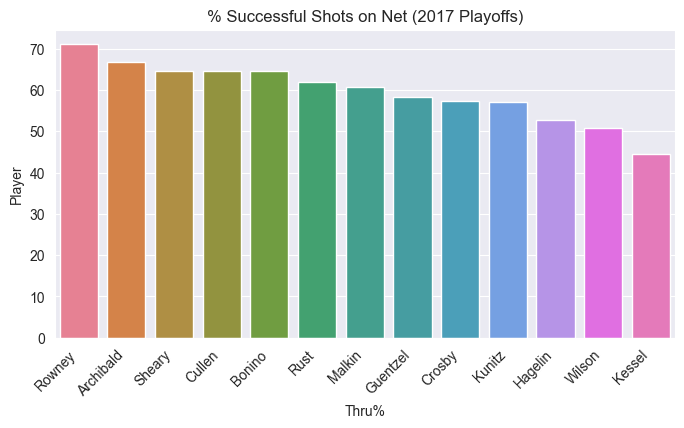

In [49]:
#sort the DataFrame by the number of assists
Thru_stats = pens_player_stats_2017.sort_values(by='Thru%', ascending=False)
selected_positions = ['C', 'LW', 'RW']
Thru_stats_filtered = Thru_stats[Thru_stats['Pos'].isin(selected_positions)]


plt.figure(figsize=(8, 4))
sns.barplot(x='lastName', y='Thru%', data=Thru_stats_filtered, hue='lastName')

plt.title('% Successful Shots on Net (2017 Playoffs)')
plt.xlabel('Thru%')
plt.ylabel('Player')
plt.xticks(rotation=45, ha='right')
plt.show()

In the 2017 playoffs, Thru%—the percentage of successful shots on net—reveals notable shifts within the HBK line. Nick Bonino emerges as the sole representative from the line among the top 5 players in Thru%, indicating his efficiency in converting shots into successful attempts.

A closer look at the Thru% rankings for the HBK line members from the previous year unveils significant changes. Phil Kessel, who held the third position in Thru% in the preceding playoffs, experienced a notable decline, moving from third to last. Carl Hagelin, previously in the top five, now finds himself among the bottom three. These shifts suggest variations in shooting effectiveness and highlight the dynamic nature of player performance from one playoff season to the next.

The Thru% analysis provides valuable insights into the shooting efficiency of the HBK line during the 2017 playoffs, showcasing individual players' abilities to convert shots into successful offensive contributions.

#### Goals are more than just the scorer. How do the players rank on assists?

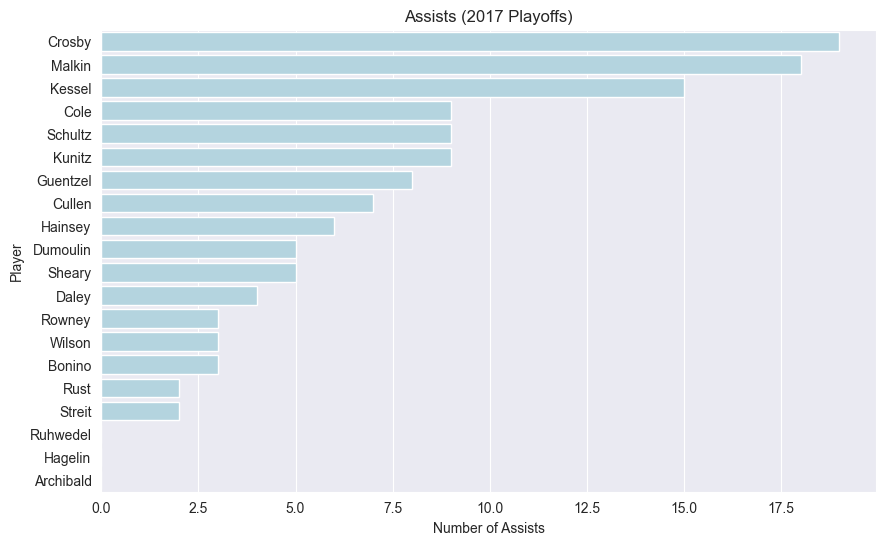

In [50]:
#sort the DataFrame by the number of assists
pens_player_stats_2017 = pens_player_stats_2017.sort_values(by='assists', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='assists', y='lastName', data=pens_player_stats_2017, color='lightblue')

plt.title('Assists (2017 Playoffs)')
plt.xlabel('Number of Assists')
plt.ylabel('Player')
plt.show()

In contrast to the 2016 playoffs, the 2017 postseason exhibits a notable transformation in assist contributions. Sidney Crosby and Evgeni Malkin take center stage, dominating the assist metrics, a result of their collaborative play with linemates Jake Guentzel and Bryan Rust.

Phil Kessel stands out as the lone representative from the HBK line to secure a spot in the top five for assists, maintaining his third-place ranking. 

The departure from the previous year's assist counts is evident, with Carl Hagelin experiencing a stark decline. While Hagelin contributed 10 assists in the 2016 playoffs, his assist count for the 2017 season plummeted to zero—an unexpected drop that raises intriguing questions about what circumstances may have caused such a decline. This unexpected shift presents an intriguing avenue for future investigation to uncover the nuanced factors influencing player performance and line dynamics.

## CORSI and Fenwick are two common ways to measure player success. 
### Below, we look at the CORSI For % (CF%) and Fenwick For % (FF%):


**Corsi For (CF)** represents the total number of shot attempts (shots on goal, missed shots, and blocked shots) generated by a team or player while they are on the ice.
It is an indicator of offensive activity and measures how often a team or player is involved in offensive plays.


**Corsi Against (CA)** represents the total number of shot attempts (shots on goal, missed shots, and blocked shots) faced by a team or player while they are on the ice.
It is an indicator of defensive activity and measures how often a team or player is defending against shot attempts from the opposing team.

**CF% = CF/(CF+CA)** - above a 50% in this category indicates that when this player was on the ice, the team controlled the puck more often than not.



**Fenwick For (FF)** represents the total number of unblocked shot attempts (shots on goal and missed shots) generated by a team or player while they are on the ice.
FF does not include blocked shots in the count, focusing on shots that reach the net or miss the net entirely.


**Fenwick Against (FA)** represents the total number of unblocked shot attempts (shots on goal and missed shots) faced by a team or player while they are on the ice.
Similar to FF, FA excludes blocked shots, providing a measure of defensive activity without considering shots that were blocked by the opposing team.

**FF% = FF/(FF+FA)** - above a 50% in this category indicates that when this player was on the ice, the team controlled the puck more often than not.


In [51]:
#isolate these metrics
Corsi_Fenwick_stats_2017 = pens_player_stats_2017[['lastName','CF%', 'FF%']].sort_values(by='CF%', ascending=False)

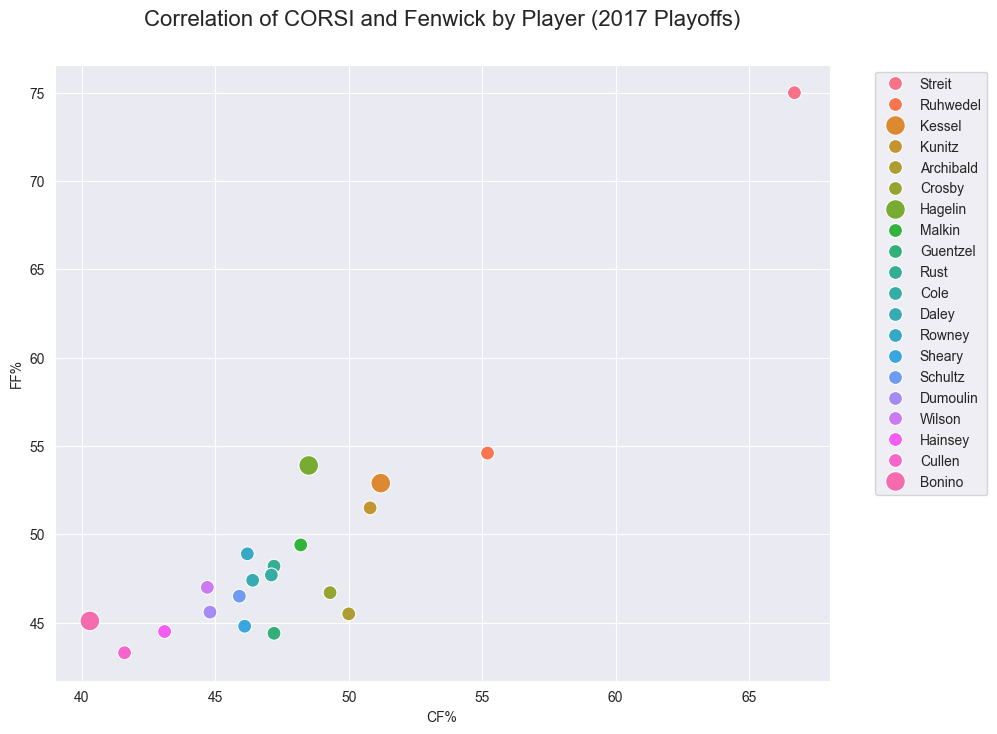

In [52]:
players_to_enlarge = ['Hagelin', 'Bonino', 'Kessel']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='CF%', y='FF%', data=Corsi_Fenwick_stats_2017, hue='lastName', size='lastName',
                sizes={player: 200 if player in players_to_enlarge else 100 for player in Corsi_Fenwick_stats_2017['lastName']})



plt.title('Correlation of CORSI and Fenwick by Player (2017 Playoffs)', fontsize=16, y=1.05)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('CorsiFenwick2016.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

Due to Streit being a major outlier, this graph is much harder to analyze. 

It would be worth investigating why he is such an outlier in the future- whether it is data error or another anomoly. For now, I'd like to graph the same thing again excluding his metrics.

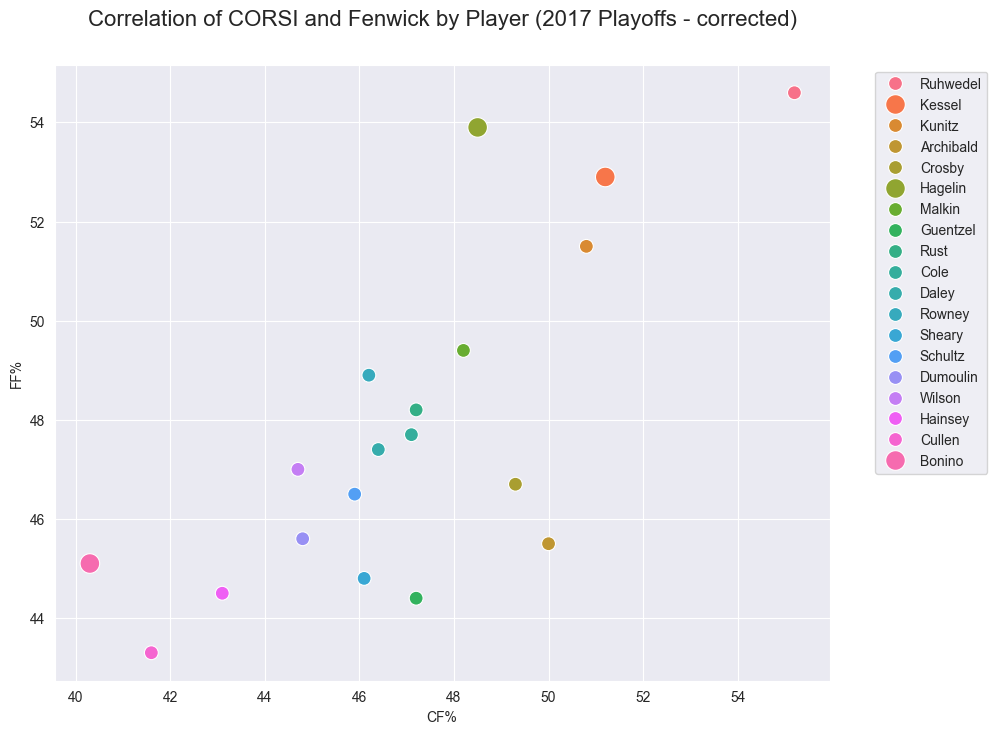

In [53]:
#exclude Streit from the DataFrame
Corsi_Fenwick_stats_2017_no_outlier = Corsi_Fenwick_stats_2017[Corsi_Fenwick_stats_2017['lastName'] != 'Streit']

players_to_enlarge = ['Hagelin', 'Bonino', 'Kessel']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='CF%', y='FF%', data=Corsi_Fenwick_stats_2017_no_outlier, hue='lastName', size='lastName',
                sizes={player: 200 if player in players_to_enlarge else 100 for player in Corsi_Fenwick_stats_2017_no_outlier['lastName']})

plt.title('Correlation of CORSI and Fenwick by Player (2017 Playoffs - corrected)', fontsize=16, y=1.05)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('CorsiFenwick2016.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

The relationship between metrics takes on a less overtly linear appearance in the 2017 playoffs, yet a discernible correlation persists. A closer examination of the graph reveals a dispersion among the HBK line players, suggesting a more varied impact on metrics compared to the previous year.

Nick Bonino experiences a shift, boasting the lowest CORSI score and registering among the lowest Fenwick scores. This departure from the 2016 dynamics implies a change in his on-ice contributions.

Conversely, Phil Kessel and Carl Hagelin emerge with some of the highest Fenwick scores, positioning them in the top 50% of CORSI scores. Kessel secures an impressive rank, outpacing everyone except for Chad Ruhwedel in these metrics for the 2017 playoffs. 

This variance among the HBK line members in advanced metrics invites further exploration into the specific factors influencing their individual performances and contributions to team possession.

## "Puck Luck"
**PDO, often referred to as "Puck Luck,"** is a composite statistic in hockey analytics that combines a team's on-ice shooting percentage (Shooting Percentage or Sh%) and save percentage (Save Percentage or Sv%) in order to assess a team's overall efficiency in converting scoring chances into goals. The term "PDO" itself doesn't stand for anything specific; it's just a name given to this combined metric.

The formula for PDO is:

PDO = Shooting Percentage + Save Percentage


Here's a breakdown of the components:



**Shooting Percentage (oiSH%)** represents the proportion of shots on goal that result in goals. It is calculated as the number of goals scored divided by the number of shots on goal.

-   Shooting Percentage (Sh%) = (Goals / Shots on Goal) * 100


**Save Percentage (oiSV%)** represents the proportion of shots on goal that are stopped by the goaltender. It is calculated as the number of saves divided by the number of shots on goal faced by the goaltender.

-   Save Percentage (Sv%) = (Saves / Shots on Goal Faced) * 100

By combining Shooting Percentage and Save Percentage, PDO aims to capture the overall randomness and variability in a team's performance that may not be entirely within their control. A high PDO may indicate that a team is experiencing above-average luck, while a low PDO may suggest below-average luck. Over the long term, teams are generally expected to regress towards an average PDO of around 100.

It's important to note that while PDO can provide insights into short-term luck or variance, it is not necessarily a predictive metric for long-term team success. Teams with consistently high PDO may be benefiting from luck, but sustained success often requires strong underlying performance in other aspects of the game.

In [54]:
#isolate PDO variables
puck_luck_2017 = pens_player_stats_2017[['lastName','oiSH%', 'oiSV%','PDO']].sort_values(by='PDO', ascending=False)

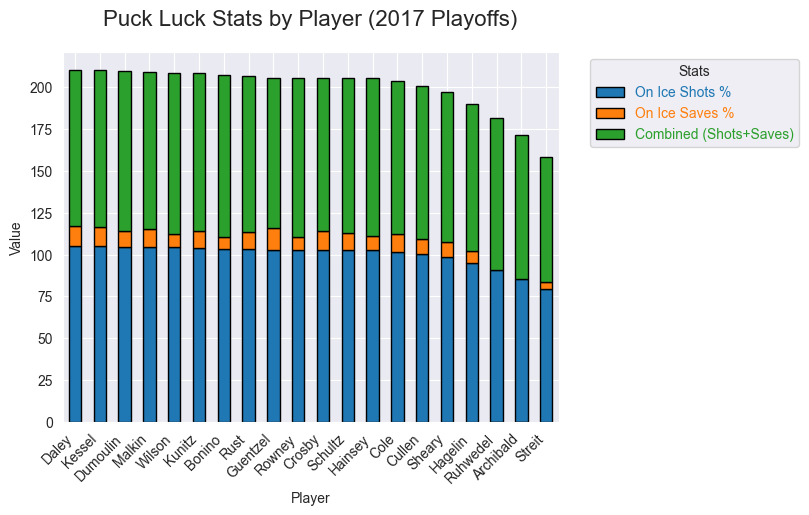

In [55]:
#melt the dF
puck_luck_2017_melted = pd.melt(puck_luck_2017, id_vars='lastName')

#pivot the DataFrame for a stacked bar graph
df_puck_luck_pivoted = puck_luck_2017_melted.pivot(index='lastName', columns='variable', values='value')

#sort by the 'PDO' column in descending order
df_puck_luck_pivoted = df_puck_luck_pivoted.sort_values(by='PDO', ascending=False)

ax = df_puck_luck_pivoted.plot(kind='bar', stacked=True, edgecolor='black')

plt.title('Puck Luck Stats by Player (2017 Playoffs)', fontsize=16, y=1.05)
plt.xlabel('Player')
plt.ylabel('Value')

#customize legend labels
legend_labels = {'oiSH%': 'On Ice Shots %', 'oiSV%': 'On Ice Saves %', 'PDO': 'Combined (Shots+Saves)'}
handles, _ = ax.get_legend_handles_labels()

#create a separate legend
legend = plt.legend(handles=handles, labels=[legend_labels[label] for label in puck_luck_2017_melted['variable'].unique()],
                    title='Stats', loc='upper left', bbox_to_anchor=(1.05, 1))

#adjust legend color
for handle, label in zip(legend.legend_handles, legend.get_texts()):
    label.set_color(handle.get_facecolor())

#rotate x-axis labels at 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

#### Just for fun, let's look at this same graph, but just for Forwards (C,LW,RW)

In [56]:
#isolate PDO variables
puck_luck_forwards_2017 = pens_player_stats_2017[['lastName','oiSH%', 'oiSV%','PDO', 'Pos']].sort_values(by='PDO', ascending=False)

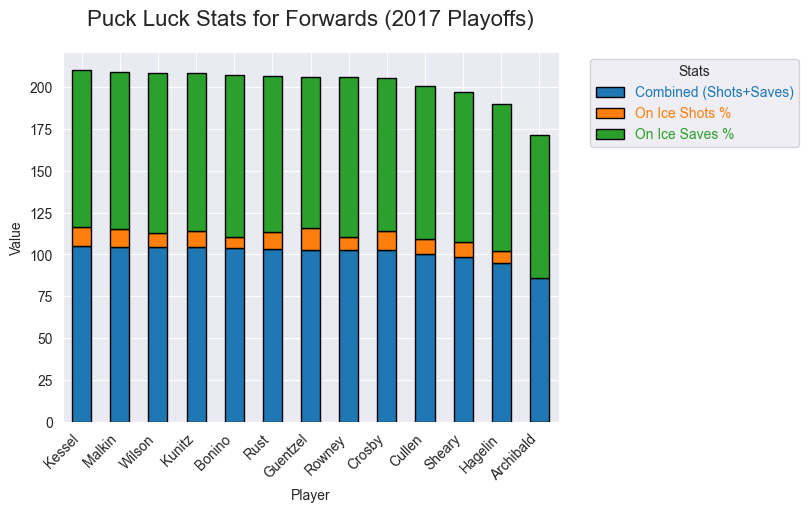

In [65]:
selected_positions = ['C', 'LW', 'RW']
puck_luck_2017_filtered = puck_luck_forwards_2017[puck_luck_forwards_2017['Pos'].isin(selected_positions)]
#melt the DataFrame
puck_luck_2017_melted = pd.melt(puck_luck_2017_filtered, id_vars='lastName', var_name='variable', value_name='value')
#create a pivot table for a stacked bar graph
df_puck_luck_pivoted = puck_luck_2017_melted[puck_luck_2017_melted['variable'] != 'Pos'].pivot_table(
    index='lastName', columns='variable', values='value', aggfunc='sum')
#sort the DataFrame by the 'PDO' column in descending order
df_puck_luck_pivoted = df_puck_luck_pivoted.sort_values(by='PDO', ascending=False)
#plot
ax = df_puck_luck_pivoted.plot(kind='bar', stacked=True, edgecolor='black')
plt.title('Puck Luck Stats for Forwards (2017 Playoffs)', fontsize=16, y=1.05)
plt.xlabel('Player')
plt.ylabel('Value')

#customize legend labels and create
legend_labels = {'oiSH%': 'On Ice Shots %', 'oiSV%': 'On Ice Saves %', 'PDO': 'Combined (Shots+Saves)'}
handles, _ = ax.get_legend_handles_labels()
legend = plt.legend(handles=handles, labels=[legend_labels[label] for label in df_puck_luck_pivoted.columns],
                    title='Stats', loc='upper left', bbox_to_anchor=(1.05, 1))
for handle, label in zip(legend.legend_handles, legend.get_texts()):
    label.set_color(handle.get_facecolor())

#rotate x-axis labels at 45 degrees
plt.xticks(rotation=45, ha='right')
plt.show()

This year, the player distribution in the lineup sees a more even spread for key contributors, including Hagelin, Bonino, Kessel, as well as Malkin, Crosby, Kunitz, and Sheary. This balanced distribution suggests a potential adjustment in team strategies or player roles compared to the more concentrated alignment in 2016.

The concept of "Puck Luck" takes center stage in this playoff season. Phil Kessel emerges as a standout example, displaying exceptional fortune in his plays. In contrast, the scoring performance of Carl Hagelin appears unexpectedly subdued, presenting a compelling anomaly against prior expectations based on historical data. 

This variance in outcomes prompts a closer examination of the factors influencing individual player performances and luck-related dynamics during the 2017 playoffs.

## Plus / Minus

PlusMinus, or +/- indicates the relationship between goals scored for the team, vs goals scored against the team. 

There is debate regarding the value, and yet this metric is commonly used in all of hockey analytics. 

The easiest way to consider player +/- is with visualizations:

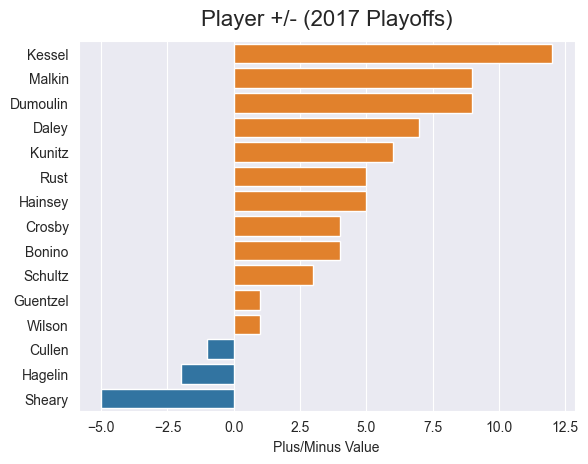

In [66]:
sns.barplot(x='plusMinus', y='lastName', data=pens_player_stats_2017, orient='h', hue=pens_player_stats_2017['plusMinus'] >= 0, order=pens_player_stats_2017.sort_values('plusMinus', ascending=False)['lastName'])
plt.xlabel('Plus/Minus Value')
plt.ylabel('')
plt.title('Player +/- (2017 Playoffs)', fontsize=16, y=1.02)
plt.legend().set_visible(False)
plt.show()

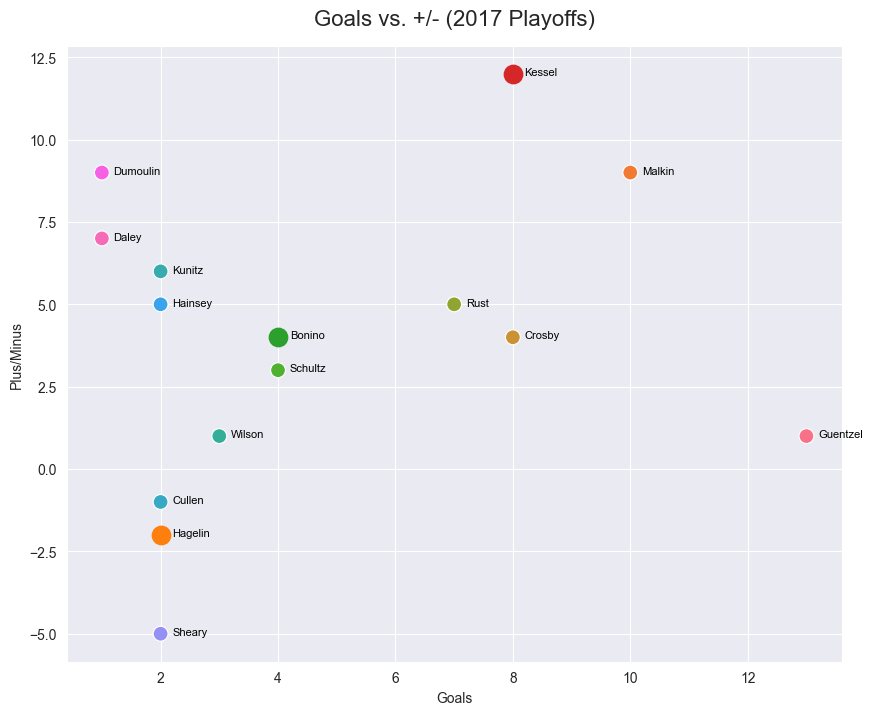

In [67]:
players_to_enlarge = ['Hagelin', 'Bonino', 'Kessel']


plt.figure(figsize=(10, 8))

scatter_plot = sns.scatterplot(
    data=pens_player_stats_2017,
    x='goals',
    y='plusMinus',
    hue='lastName',
    s=115,
    legend=False  
)

#emphasis on HBK Line
for player in players_to_enlarge:
    subset = pens_player_stats_2017[pens_player_stats_2017['lastName'] == player]
    scatter_plot.scatter(subset['goals'], subset['plusMinus'], s=175, label=player)

#annotate dots with all player names
for i, player_row in pens_player_stats_2017.iterrows():
    scatter_plot.text(
        player_row['goals'] + 0.2,  
        player_row['plusMinus'] - 0.1,  
        player_row['lastName'],
        ha='left',
        va='bottom',
        fontsize=8,  
        color='black'  
    )

plt.xlabel('Goals')
plt.ylabel('Plus/Minus')
plt.title('Goals vs. +/- (2017 Playoffs)', size=16, y=1.02)
plt.show()

Examining the raw +/- statistics, Phil Kessel emerges as the clear frontrunner, aligning with his impressive goal-scoring prowess. The correlation between Kessel's goal count and a positive +/- is evident in this straightforward metric.

Nick Bonino follows with a more conservative +/-, maintaining a positive value. Meanwhile, the unexpected negative value for Carl Hagelin raises intriguing questions, particularly given his association with Phil Kessel. A preliminary hypothesis suggests that Kessel might have participated in numerous power plays without Hagelin, although a comprehensive investigation into the data is essential to validate this assumption. This opens the door to a potential avenue for future research and a deeper understanding of player dynamics within specific game scenarios.

## No way around it, goals are important

### Looking at goals for the entire 2017 playoffs vs. average ice time per player:
As we learned in the 2016 study, it makes the most sense to only look at forwards for comparison.

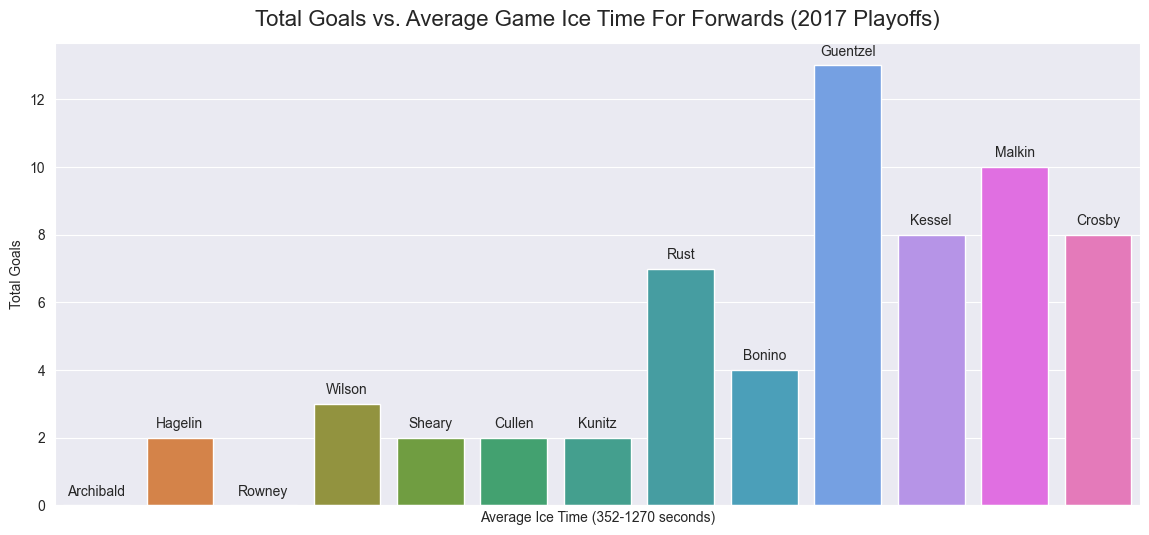

In [60]:
selected_positions = ['C', 'LW', 'RW']
filtered_data = pens_player_stats_2017[pens_player_stats_2017['Pos'].isin(selected_positions)]

plt.figure(figsize=(14, 6))
#create the bar plot
ax = sns.barplot(data=filtered_data, x='timeOnIce', y='goals', hue='lastName', dodge=False, err_kws={'color': 'None'})

#get legend handles and labels
handles, labels = ax.get_legend_handles_labels()

#annotate each bar with player name
for p, player_name in zip(ax.patches, labels):
    ax.annotate(player_name, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Average Ice Time (352-1270 seconds)')
plt.ylabel('Total Goals')
plt.title('Total Goals vs. Average Game Ice Time For Forwards (2017 Playoffs)', fontsize=16, y=1.02)
plt.xticks([])  
plt.legend().set_visible(False)  
plt.show()

This year, there seems to be a similar correlation between ice time and goals. However, unlike last year when Kessel was an outlier with substantially more goals vs. icetime, this year Guentzel is awarded that impressive acheivement. 

This also shows how little icetime on average Hagelin had during the 2017 playoffs. This indicates that for future study, I need to look into what/how many games he missed, and who took his place with Kessel and Bonino. The lack of icetime definitely helps to explain some of the other poor metrics we've seen for Hagelin this year.

### Visualizing as a percent of the whole, with a focus on Hagelin, Bonino and Kessel:

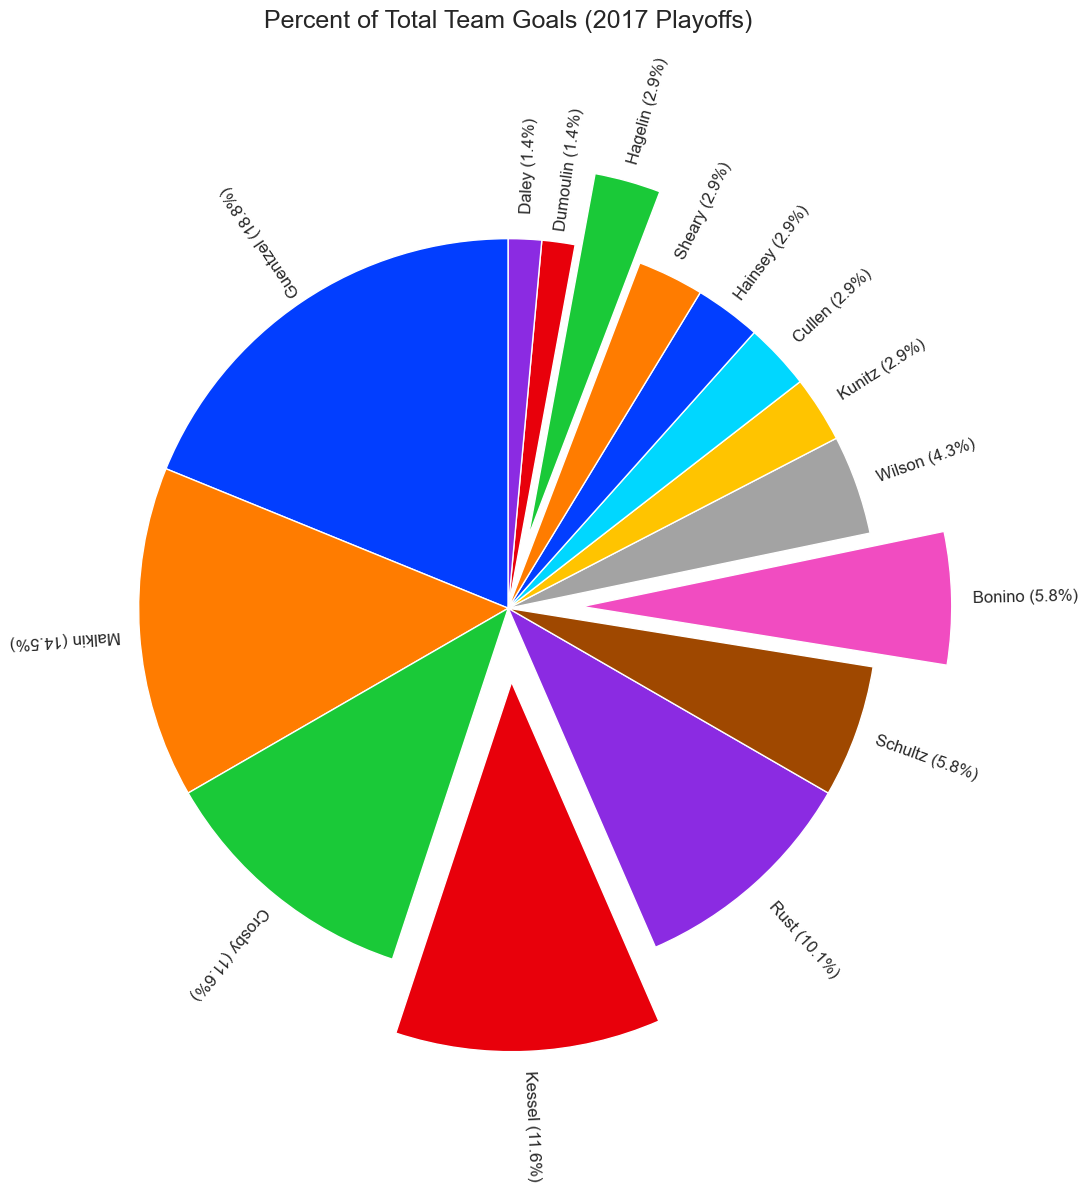

In [68]:
#filter players with non-zero goals
pens_player_stats_2017 = pens_player_stats_2017[pens_player_stats_2017['goals'] > 0]

labels = pens_player_stats_2017['lastName']
sizes = pens_player_stats_2017['goals']
colors = sns.color_palette("bright")
#sort by 'goals' in descending order
pens_player_stats_2017 = pens_player_stats_2017.sort_values(by='goals', ascending=False)
#define explode for specific slices
explode = [0.2 if label in ['Bonino', 'Hagelin', 'Kessel'] else 0 for label in labels]

plt.figure(figsize=(12, 12))
#draw pie chart without autopct labels
patches, _ = plt.pie(sizes, labels=None, startangle=90, colors=colors, explode=explode)

#calculate and display percentage labels
for i, (label, size) in enumerate(zip(labels, sizes)):
    angle = (patches[i].theta1 + patches[i].theta2) / 2
    x = patches[i].center[0] + patches[i].r * 1.2 * np.cos(np.radians(angle))
    y = patches[i].center[1] + patches[i].r * 1.2 * np.sin(np.radians(angle))
    
    #calculate percentage
    percentage = (size / sizes.sum()) * 100
    
    plt.text(x, y, f'{label} ({percentage:.1f}%)', ha='center', va='center', rotation=angle, fontsize=12)

plt.title('Percent of Total Team Goals (2017 Playoffs)', fontsize=18, y=1.12)
plt.savefig('PercentTotalGoals2016.png')
plt.show()

In contrast to the previous year, the 2017 Playoffs showcase a shift in goal contributions. The HBK line accounted for only 20.3% of the team's total goals. A comparative analysis against the first and second lines further emphasizes this shift:

- The first line, led by Crosby, Sheary, and Guentzel, secured a remarkable 33.3% of all goals, constituting a third of the total.
- The second line, featuring Malkin, Kunitz, and Rust, contributed 27.5% of the team's goals.

This distribution aligns more closely with the conventional progression observed across the 1st, 2nd, and 3rd lines in hockey. Evaluating the goal-scoring impact of the HBK line in the 2017 Playoffs solely based on goals presents a nuanced challenge, and further exploration is warranted to decipher their overall influence on the Penguins' Stanley Cup victory.

## Conclusion: Decoding the 2017 Playoffs

In dissecting the performances of the HBK line during the 2017 playoffs, a nuanced narrative unfolds, revealing the intricate interplay of player contributions and the ever-evolving landscape of hockey dynamics.

**Shifts in Thru% Rankings**: The 2017 playoffs brought about a recalibration in the Thru% rankings within the HBK line. Phil Kessel experienced a noticeable decline, sliding from third to last. Concurrently, Carl Hagelin, who previously secured a top-five position, found himself among the bottom three. This deviation prompts questions about shooting effectiveness and individual player roles, laying the groundwork for future investigations into the factors influencing offensive contributions.

**Assist Landscape Reimagined**: The assist dynamics underwent a significant transformation in 2017. While Sidney Crosby and Evgeni Malkin took center stage, the HBK line's representation in the top assist contributors dwindled. Phil Kessel remained the sole representative in the top five, maintaining his third-place rank. The unexpected drop in Carl Hagelin's assist count, from 10 in 2016 to zero in 2017, introduces an intriguing anomaly that beckons further exploration into the circumstances influencing line dynamics and player roles.

**Dispersed Advanced Metrics**: Advanced metrics, such as CORSI and Fenwick scores, manifested a more dispersed pattern in 2017. Nick Bonino, a stalwart in the previous year, experienced a shift with the lowest CORSI score and among the lowest Fenwick scores. Conversely, Phil Kessel and Carl Hagelin emerged with high Fenwick scores, positioning them in the top 50% of CORSI. The variance in these metrics hints at altered on-ice contributions, prompting future investigations into the specific factors influencing individual performances and possession dynamics.

**Goal Contribution Evolution**: The most palpable evolution in 2017 was the HBK line's diminished share of total team goals. Accounting for only 20.3% of the goals, a notable decrease from the previous year, prompts a reassessment of their impact. Comparative analysis against the first and second lines accentuates this shift. The first line, led by Crosby, Sheary, and Guentzel, secured a substantial 33.3% of all goals, displaying the conventional progression observed across hockey lines. The HBK line's reduced goal contribution invites further exploration into the intricacies of offensive strategies and interactions between lines.

In conclusion, the exploration of the HBK line's dynamics in the 2017 playoffs unravels a story of adaptation and transformation. From shifts in shooting efficiency to recalibrated assist landscapes and dispersed advanced metrics, the line's journey in 2017 beckons researchers to delve deeper into the factors influencing player performances and their nuanced impact on team success within the dynamic realm of hockey.